<div style="border-radius: 20px; border: 2px solid #ca1f7b; padding: 25px; background: linear-gradient(145deg, #f06292, #ca1f7b); text-align: center; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.4), 0px 6px 20px rgba(0, 0, 0, 0.19); transform: perspective(1000px) rotateX(5deg) rotateY(-5deg); transition: transform 0.5s ease-in-out;">
    <h1 style="color: white; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); font-weight: bold; margin-bottom: 15px; font-size: 36px;">
        Welcome!
    </h1>
    <p style="color: white; font-size: 20px; margin: 15px 0; font-family: 'Arial', sans-serif;">
        Hi there! I'm Himel Sarder, a passionate Data Scientist and ML Engineer in training. I'm exploring the world of AI, diving deep into various concepts and techniques to improve my skills. Join me as we embark on this exciting journey to learn and grow together in the AI field.
    </p>
    <p style="color: white; font-size: 18px; font-style: italic; margin: 15px 0;">
        "Community empowers growth through shared knowledge and mutual support."
    </p>
    <h2 style="color: white; margin-top: 25px; font-size: 32px; font-weight: bold;">Contact Information</h2>
    <table style="width: 100%; margin-top: 20px; border-collapse: collapse;">
        <tr>
            <th style="color: white; font-size: 20px; padding: 12px; border-bottom: 2px solid #ca1f7b; background-color: rgba(255, 255, 255, 0.2);">Name</th>
            <th style="color: white; font-size: 20px; padding: 12px; border-bottom: 2px solid #ca1f7b; background-color: rgba(255, 255, 255, 0.2);">Email</th>
            <th style="color: white; font-size: 20px; padding: 12px; border-bottom: 2px solid #ca1f7b; background-color: rgba(255, 255, 255, 0.2);">LinkedIn</th>
            <th style="color: white; font-size: 20px; padding: 12px; border-bottom: 2px solid #ca1f7b; background-color: rgba(255, 255, 255, 0.2);">GitHub</th>
            <th style="color: white; font-size: 20px; padding: 12px; border-bottom: 2px solid #ca1f7b; background-color: rgba(255, 255, 255, 0.2);">Kaggle</th>
        </tr>
        <tr>
            <td style="font-size: 18px; padding: 12px; color: white;">Himel Sarder</td>
            <td style="font-size: 18px; padding: 12px; color: white;">info.himelcse@gmail.com</td>
            <td style="font-size: 18px; padding: 12px;">
                <a href="https://www.linkedin.com/in/himel-sarder/" target="_blank" style="text-decoration: none;">
                    <img src="https://img.shields.io/badge/LinkedIn-ca1f7b.svg?style=for-the-badge&logo=LinkedIn&logoColor=white" alt="LinkedIn Badge" style="border-radius: 5px; transition: transform 0.3s ease;">
                </a>
            </td>
            <td style="font-size: 18px; padding: 12px;">
                <a href="https://github.com/Himel-Sarder" target="_blank" style="text-decoration: none;">
                    <img src="https://img.shields.io/badge/GitHub-ca1f7b.svg?style=for-the-badge&logo=GitHub&logoColor=white" alt="GitHub Badge" style="border-radius: 5px; transition: transform 0.3s ease;">
                </a>
            </td>
            <td style="font-size: 18px; padding: 12px;">
                <a href="https://www.kaggle.com/himelsarder" target="_blank" style="text-decoration: none;">
                    <img src="https://img.shields.io/badge/Kaggle-ca1f7b.svg?style=for-the-badge&logo=Kaggle&logoColor=white" alt="Kaggle Badge" style="border-radius: 5px; transition: transform 0.3s ease;">
                </a>
            </td>
        </tr>
    </table>
</div>


In [146]:
import sqlite3
import pandas as pd

In [147]:
cnn = sqlite3.connect("/kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db")

In [148]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [149]:
%sql sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db

In [150]:
conn = sqlite3.connect('/kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db')
sql_query = """SELECT name FROM sqlite_master  
  WHERE type='table';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())
conn.close()

[('Episode_Info',), ('Viewership_Info',)]


In [151]:
conn = sqlite3.connect('/kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db')
sql_query = """SELECT sql FROM sqlite_master  
  WHERE name='Episode_Info';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchone()[0])
conn.close()

CREATE TABLE Episode_Info (
            EpisodeID INTEGER PRIMARY KEY NOT NULL,
            Season INT,
            EpisodeSeason INT,
            Title VARCHAR(255) NOT NULL,
            Director TEXT,
            Writer TEXT,
            Runtime INTEGER,
            Summary TEXT,
            Air_date DATE
        )


In [152]:
conn = sqlite3.connect('/kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db')
sql_query = """SELECT sql FROM sqlite_master  
  WHERE name='Viewership_Info';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchone()[0])
conn.close()

CREATE TABLE Viewership_Info (
            EpisodeNewID INT,
            Viewership_premiere_US REAL,
            Viewership_premiere_US_linear_tv REAL,
            Approval_Rating REAL,
            Average_Rating REAL,
            FOREIGN KEY (EpisodeNewID) REFERENCES episode_info(EpisodeID)
        )


In [153]:
conn = sqlite3.connect('/kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db')
df = pd.read_sql("SELECT * FROM Episode_Info", conn)
conn.close()
df

,EpisodeID,Season,EpisodeSeason,Title,Director,Writer,Runtime,Summary,Air_date
0,1,1,1,The Heirs of the Dragon,Miguel Sapochnik,Ryan Condal,66,"As the first episode of the series, it introdu...",2022-08-21 00:00:00
1,2,1,2,The Rogue Prince,Greg Yaitanes,Ryan Condal,54,"""The Rogue Prince"" is the second episode of th...",2022-08-28 00:00:00
2,3,1,3,Second of His Name,Greg Yaitanes,"Gabe Fonseca, Ryan Condal",63,The plot follows the second birthday celebrati...,2022-09-04 00:00:00
3,4,1,4,King of the Narrow Sea,Clare Kilner,Ira Parker,63,The plot follows Rhaenyras return from her tou...,2022-09-11 00:00:00
4,5,1,5,We Light the Way,Clare Kilner,Charmaine DeGraté,60,The plot depicts Daemon visiting his estranged...,2022-09-18 00:00:00
5,6,1,6,The Princess and the Queen,Miguel Sapochnik,Sara Hess,68,The episode features a 10-year time jump after...,2022-09-25 00:00:00
6,7,1,7,Driftmark,Miguel Sapochnik,Kevin Lau,59,The plot follows Laena Velaryons funeral at Dr...,2022-10-02 00:00:00
7,8,1,8,The Lord of the Tides,Geeta Vasant Patel,Eileen Shim,68,The episode features a six-year time jump afte...,2022-10-09 00:00:00
8,9,1,9,The Green Council,Clare Kilner,Sara Hess,58,The plot follows the aftermath of Viserys deat...,2022-10-16 00:00:00
9,10,1,10,The Black Queen,Greg Yaitanes,Ryan Condal,59,The plot depicts Princess Rhaenys arrival at D...,2022-10-23 00:00:00


In [154]:
conn = sqlite3.connect('/kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db')
df = pd.read_sql("SELECT * FROM Viewership_Info", conn)
conn.close()
df

,EpisodeNewID,Viewership_premiere_US,Viewership_premiere_US_linear_tv,Approval_Rating,Average_Rating
0,1,9.99M,2.1,0.85,0.76
1,2,10.2M,2.2,0.85,0.74
2,3,nan,1.7,0.83,0.73
3,4,nan,1.8,0.87,0.76
4,5,nan,1.8,0.85,0.75
5,6,nan,1.8,0.86,0.75
6,7,nan,1.9,0.93,0.74
7,8,nan,1.7,0.91,0.73
8,9,nan,1.5,0.85,0.78
9,10,9.3M,1.9,0.93,0.83


In [155]:
from sql import run

run.prettytable.DEFAULT = run.prettytable.MSWORD_FRIENDLY

In [156]:
from prettytable import PrettyTable, MSWORD_FRIENDLY

t = PrettyTable()
t.set_style(MSWORD_FRIENDLY) 

In [157]:
%%sql
SELECT *
FROM Episode_Info

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Season,EpisodeSeason,Title,Director,Writer,Runtime,Summary,Air_date
1,1,1,The Heirs of the Dragon,Miguel Sapochnik,Ryan Condal,66,"As the first episode of the series, it introduces the setting and the main characters of the show. The episode centers on the debate over King Viserys Targaryens heir to the Iron Throne, specifically between his brother Daemon and his first-born daughter Rhaenyra, following the stillbirth of his first-born son.",2022-08-21 00:00:00
2,1,2,The Rogue Prince,Greg Yaitanes,Ryan Condal,54,"""The Rogue Prince"" is the second episode of the first season of the fantasy drama television series House of the Dragon, a prequel to Game of Thrones. The episode was written by series co-creator Ryan Condal and directed by Greg Yaitanes. It first aired on HBO and HBO Max on August 28, 2022. The title of the episode is named after George R. R. Martins 2014 novelette.",2022-08-28 00:00:00
3,1,3,Second of His Name,Greg Yaitanes,"Gabe Fonseca, Ryan Condal",63,"The plot follows the second birthday celebration of Viserys and Alicents firstborn son, Prince Aegon Targaryen; as well as Daemon and Corlys battling the Triarchy warriors at Stepstones, which led to the death of Craghas Drahar.",2022-09-04 00:00:00
4,1,4,King of the Narrow Sea,Clare Kilner,Ira Parker,63,"The plot follows Rhaenyras return from her tour of choosing a consort, Daemons return from Stepstones, the growing bonding between the two aforementioned characters, and the revocation of Otto Hightower as King Viserys Hand.",2022-09-11 00:00:00
5,1,5,We Light the Way,Clare Kilner,Charmaine DeGraté,60,"The plot depicts Daemon visiting his estranged wife, Rhea Royce, in the Vale and the wedding of Princess Rhaenyra Targaryen and Ser Laenor Velaryon.",2022-09-18 00:00:00
6,1,6,The Princess and the Queen,Miguel Sapochnik,Sara Hess,68,"The episode features a 10-year time jump after the previous episode and depicts the birth of Rhaenyra and Laenors third son Joffrey; Daemon, Laena, and their daughters Baela and Rhaenas visit to Pentos; and the consequences of allegation surrounding Rhaenyra and Laenors sons as bastards.",2022-09-25 00:00:00
7,1,7,Driftmark,Miguel Sapochnik,Kevin Lau,59,"The plot follows Laena Velaryons funeral at Driftmark; Aemond claiming Laenas dragon Vhagar which leads to a fight between him and Baela, Rhaena, Jacaerys and Lucerys, resulting in Aemond losing his left eye; and continued speculation surrounding Rhaenyra and Laenors sons as bastards.",2022-10-02 00:00:00
8,1,8,The Lord of the Tides,Geeta Vasant Patel,Eileen Shim,68,"The episode features a six-year time jump after the previous episode and depicts the discussion in Kings Landing regarding Lord Corlys Velaryons successor as ""the Lord of the Tides"", initiated by his brother Ser Vaemond Velaryons disapproval of the previously-approved successor, Corlys grandson, Lucerys; King Viserys deteriorating health leading to his death; and the announcement of the betrothals of Jacaerys Velaryon and Baela Targaryen as well as Lucerys Velaryon and Rhaena Targaryen.",2022-10-09 00:00:00
9,1,9,The Green Council,Clare Kilner,Sara Hess,58,"The plot follows the aftermath of Viserys death in Kings Landing, starting with a discussion of Viserys last words heard by Alicent in the previous episode regarding Aegon the Conquerors dream, which she misinterprets as Viserys wanting their son Prince Aegon to be his successor. It ends with the coronation of Aegon, which leads to Rhaenys intruding the ceremony with her dragon Meleys.",2022-10-16 00:00:00
10,1,10,The Black Queen,Greg Yaitanes,Ryan Condal,59,"The plot depicts Princess Rhaenys arrival at Dragonstone from Kings Landing to deliver the news of King Viserys death. Rhaenyra is subsequently crowned Queen of the Seven Kingdoms and opposes her factions demands for open war, instead wanting to secure alliances. Her son, Lucerys, is sent to Storms End to gain Baratheon support for Rhaenyras cause. At Storms End, Lucerys meets and is harassed by his unc

In [158]:
%%sql
SELECT *
FROM Viewership_Info

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeNewID,Viewership_premiere_US,Viewership_premiere_US_linear_tv,Approval_Rating,Average_Rating
1,9.99M,2.1,0.85,0.76
2,10.2M,2.2,0.85,0.74
3,nan,1.7,0.83,0.73
4,nan,1.8,0.87,0.76
5,nan,1.8,0.85,0.75
6,nan,1.8,0.86,0.75
7,nan,1.9,0.93,0.74
8,nan,1.7,0.91,0.73
9,nan,1.5,0.85,0.78
10,9.3M,1.9,0.93,0.8300000000000001


# MAX

## Which episode had the longest runtime and what was its title?

In [159]:
%%sql
SELECT Title, Runtime
FROM Episode_Info
ORDER BY Runtime DESC
LIMIT 1;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Title,Runtime
The Queen Who Ever Was,70


In [160]:
%%sql
SELECT Title, Runtime
FROM Episode_Info
WHERE Runtime = (SELECT MAX(Runtime) FROM Episode_Info);

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Title,Runtime
The Queen Who Ever Was,70


In [161]:
%%sql
SELECT MAX(Runtime) as MAXRUNTIME, Title
FROM Episode_Info;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


MAXRUNTIME,Title
70,The Queen Who Ever Was


# MIN

## Which episode had the smallest runtime and what was its title?

In [162]:
%%sql
SELECT Title, Runtime
FROM Episode_Info
WHERE Runtime = (SELECT MIN(Runtime) FROM Episode_Info);

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Title,Runtime
The Rogue Prince,54


# COUNT

## How many episodes were aired in the first season?

In [163]:
%%sql
SELECT COUNT(*)
FROM Episode_Info
WHERE Season = 1;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


COUNT(*)
10


# How many episodes were aired in the 2nd season?

In [164]:
%%sql
SELECT COUNT(*)
FROM Episode_Info
WHERE Season = 2;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


COUNT(*)
8


# WHERE

## Who directed the episode titled "The Black Queen"?

In [165]:
%%sql
SELECT Director
FROM Episode_Info
WHERE Title = "The Black Queen"

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Director
Greg Yaitanes


## What is the summary of the episode with the title "The Green Council"?

In [166]:
%%sql
SELECT Summary
FROM Episode_Info
WHERE Title = "The Green Council"

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Summary
"The plot follows the aftermath of Viserys death in Kings Landing, starting with a discussion of Viserys last words heard by Alicent in the previous episode regarding Aegon the Conquerors dream, which she misinterprets as Viserys wanting their son Prince Aegon to be his successor. It ends with the coronation of Aegon, which leads to Rhaenys intruding the ceremony with her dragon Meleys."


## Which episode aired on October 23, 2022, and what was the primary plot?

In [167]:
%%sql
SELECT Title, Summary
FROM Episode_Info
WHERE Air_date = '2022-10-23 00:00:00';

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Title,Summary
The Black Queen,"The plot depicts Princess Rhaenys arrival at Dragonstone from Kings Landing to deliver the news of King Viserys death. Rhaenyra is subsequently crowned Queen of the Seven Kingdoms and opposes her factions demands for open war, instead wanting to secure alliances. Her son, Lucerys, is sent to Storms End to gain Baratheon support for Rhaenyras cause. At Storms End, Lucerys meets and is harassed by his uncle Aemond; Aemond loses control of his dragon Vhagar, who kills Lucerys. Daemon informs Rhaenyra of her sons death."


## What is the air date for the episode titled "Rhaenyra the Cruel"?

In [168]:
%%sql
SELECT Air_date
FROM Episode_Info
WHERE Title = 'Rhaenyra the Cruel';

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Air_date
2024-06-23 00:00:00


# AND

## How many episodes in the second season were directed by Clare Kilner?

In [169]:
%%sql
SELECT COUNT(*)
FROM Episode_Info
WHERE Season = 2 AND Director = 'Clare Kilner';

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


COUNT(*)
2


# Basic String Operations

## List all episodes in Season 1 where Rhaenyra is mentioned in the plot summary.

In [170]:
%%sql
SELECT Title, Summary
FROM Episode_Info
WHERE Season = 1 AND Summary LIKE '%Rhaenyra%';

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Title,Summary
The Heirs of the Dragon,"As the first episode of the series, it introduces the setting and the main characters of the show. The episode centers on the debate over King Viserys Targaryens heir to the Iron Throne, specifically between his brother Daemon and his first-born daughter Rhaenyra, following the stillbirth of his first-born son."
King of the Narrow Sea,"The plot follows Rhaenyras return from her tour of choosing a consort, Daemons return from Stepstones, the growing bonding between the two aforementioned characters, and the revocation of Otto Hightower as King Viserys Hand."
We Light the Way,"The plot depicts Daemon visiting his estranged wife, Rhea Royce, in the Vale and the wedding of Princess Rhaenyra Targaryen and Ser Laenor Velaryon."
The Princess and the Queen,"The episode features a 10-year time jump after the previous episode and depicts the birth of Rhaenyra and Laenors third son Joffrey; Daemon, Laena, and their daughters Baela and Rhaenas visit to Pentos; and the consequences of allegation surrounding Rhaenyra and Laenors sons as bastards."
Driftmark,"The plot follows Laena Velaryons funeral at Driftmark; Aemond claiming Laenas dragon Vhagar which leads to a fight between him and Baela, Rhaena, Jacaerys and Lucerys, resulting in Aemond losing his left eye; and continued speculation surrounding Rhaenyra and Laenors sons as bastards."
The Black Queen,"The plot depicts Princess Rhaenys arrival at Dragonstone from Kings Landing to deliver the news of King Viserys death. Rhaenyra is subsequently crowned Queen of the Seven Kingdoms and opposes her factions demands for open war, instead wanting to secure alliances. Her son, Lucerys, is sent to Storms End to gain Baratheon support for Rhaenyras cause. At Storms End, Lucerys meets and is harassed by his uncle Aemond; Aemond loses control of his dragon Vhagar, who kills Lucerys. Daemon informs Rhaenyra of her sons death."


## Retrieve episodes where the writer's name starts with 'Ryan'.

In [171]:
%%sql
SELECT EpisodeID, Writer
FROM Episode_Info WHERE Writer LIKE 'Ryan%';

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Writer
1,Ryan Condal
2,Ryan Condal
10,Ryan Condal
11,Ryan Condal
14,Ryan Condal


# AS

## List all episode titles in uppercase.

In [172]:
%%sql
SELECT UPPER(Title) AS Uppercase_Title 
FROM Episode_Info;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Uppercase_Title
THE HEIRS OF THE DRAGON
THE ROGUE PRINCE
SECOND OF HIS NAME
KING OF THE NARROW SEA
WE LIGHT THE WAY
THE PRINCESS AND THE QUEEN
DRIFTMARK
THE LORD OF THE TIDES
THE GREEN COUNCIL
THE BLACK QUEEN


## Extract the first 10 characters of each episode summary.

In [173]:
%%sql
SELECT SUBSTR(Summary, 1, 10) AS Short_Summary 
FROM Episode_Info;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Short_Summary
As the fir
"""The Rogue"
The plot f
The plot f
The plot d
The episod
The plot f
The episod
The plot f
The plot d


## Replace 'Targaryen' with 'House Targaryen' in all summaries.

In [174]:
%%sql
SELECT REPLACE(Summary, 'Targaryen', 'House Targaryen') AS Updated_Summary 
FROM Episode_Info;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Updated_Summary
"As the first episode of the series, it introduces the setting and the main characters of the show. The episode centers on the debate over King Viserys House Targaryens heir to the Iron Throne, specifically between his brother Daemon and his first-born daughter Rhaenyra, following the stillbirth of his first-born son."
"""The Rogue Prince"" is the second episode of the first season of the fantasy drama television series House of the Dragon, a prequel to Game of Thrones. The episode was written by series co-creator Ryan Condal and directed by Greg Yaitanes. It first aired on HBO and HBO Max on August 28, 2022. The title of the episode is named after George R. R. Martins 2014 novelette."
"The plot follows the second birthday celebration of Viserys and Alicents firstborn son, Prince Aegon House Targaryen; as well as Daemon and Corlys battling the Triarchy warriors at Stepstones, which led to the death of Craghas Drahar."
"The plot follows Rhaenyras return from her tour of choosing a consort, Daemons return from Stepstones, the growing bonding between the two aforementioned characters, and the revocation of Otto Hightower as King Viserys Hand."
"The plot depicts Daemon visiting his estranged wife, Rhea Royce, in the Vale and the wedding of Princess Rhaenyra House Targaryen and Ser Laenor Velaryon."
"The episode features a 10-year time jump after the previous episode and depicts the birth of Rhaenyra and Laenors third son Joffrey; Daemon, Laena, and their daughters Baela and Rhaenas visit to Pentos; and the consequences of allegation surrounding Rhaenyra and Laenors sons as bastards."
"The plot follows Laena Velaryons funeral at Driftmark; Aemond claiming Laenas dragon Vhagar which leads to a fight between him and Baela, Rhaena, Jacaerys and Lucerys, resulting in Aemond losing his left eye; and continued speculation surrounding Rhaenyra and Laenors sons as bastards."
"The episode features a six-year time jump after the previous episode and depicts the discussion in Kings Landing regarding Lord Corlys Velaryons successor as ""the Lord of the Tides"", initiated by his brother Ser Vaemond Velaryons disapproval of the previously-approved successor, Corlys grandson, Lucerys; King Viserys deteriorating health leading to his death; and the announcement of the betrothals of Jacaerys Velaryon and Baela House Targaryen as well as Lucerys Velaryon and Rhaena House Targaryen."
"The plot follows the aftermath of Viserys death in Kings Landing, starting with a discussion of Viserys last words heard by Alicent in the previous episode regarding Aegon the Conquerors dream, which she misinterprets as Viserys wanting their son Prince Aegon to be his successor. It ends with the coronation of Aegon, which leads to Rhaenys intruding the ceremony with her dragon Meleys."
"The plot depicts Princess Rhaenys arrival at Dragonstone from Kings Landing to deliver the news of King Viserys death. Rhaenyra is subsequently crowned Queen of the Seven Kingdoms and opposes her factions demands for open war, instead wanting to secure alliances. Her son, Lucerys, is sent to Storms End to gain Baratheon support for Rhaenyras cause. At Storms End, Lucerys meets and is harassed by his uncle Aemond; Aemond loses control of his dragon Vhagar, who kills Lucerys. Daemon informs Rhaenyra of her sons death."


# Advanced String Operations

## Count how many episodes have the word "battle" in their summary.

In [175]:
%%sql
SELECT COUNT(*) FROM Episode_Info 
WHERE Summary LIKE '%battle%';

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


COUNT(*)
3


## Find episodes where the director’s name has exactly 11 characters.

In [176]:
%%sql
SELECT * 
FROM Episode_Info 
WHERE LENGTH(Director) = 11;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Season,EpisodeSeason,Title,Director,Writer,Runtime,Summary,Air_date
11,2,1,A Son for a Son,Alan Taylor,Ryan Condal,58,"The plot directly follows the end of the first season finale, depicting the aftermath of the death of Rhaenyras second son, Lucerys Velaryon, and his dragon, Arrax, at Storms End. Rhaenyra finds Arraxs remains and then announces her revenge on Aemond. In response, Daemon, Rhaenyras uncle-husband, appoints two assassins in Kings Landing to kill Aemond. However, the assassins are unable to find Aemond and instead decide to kill King Aegon IIs son and heir, Jaehaerys. The episode title refers to Daemon vowing revenge against Aemond for Lucerys murder.",2024-06-16 00:00:00
14,2,4,The Red Dragon and the Gold,Alan Taylor,Ryan Condal,55,"In the episode, Ser Criston continues to rally Greens allies and executes Black supporters. He rides to Rooks Rest to attack the last Black stronghold on the Blackwater Bay. Meanwhile, Rhaenyra returns to Dragonstone and learns about Cristons plan. She agrees to send Rhaenys with her dragon Meleys to confront Criston and his troops. Feeling his council disrespects him, especially after discovering Aemonds secret communications with Criston, Aegon decides to fly to Rooks Rest with his dragon Sunfyre. Unbeknownst to each other, Rhaenys, Aegon, and Aemond (with Vhagar) converge on Rooks Rest, leading to a climactic battle involving the three dragons.",2024-07-07 00:00:00


## Find the longest episode summary by character length.

In [177]:
%%sql
SELECT Title, MAX(LENGTH(Summary)) AS Summary_Length 
FROM Episode_Info

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Title,Summary_Length
The Queen Who Ever Was,691


## Concatenate Episode Title and Director name in a single column.

In [178]:
%%sql
SELECT CONCAT(Title, ' - Directed by ', Director) AS Episode_Details 
FROM Episode_Info;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
(sqlite3.OperationalError) no such function: CONCAT
[SQL: SELECT CONCAT(Title, ' - Directed by ', Director) AS Episode_Details 
FROM Episode_Info;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


## List all episodes in chronological order based on their Air_date.

In [179]:
%%sql
SELECT Title, Air_date
FROM Episode_Info 
ORDER BY Air_date ASC;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Title,Air_date
The Heirs of the Dragon,2022-08-21 00:00:00
The Rogue Prince,2022-08-28 00:00:00
Second of His Name,2022-09-04 00:00:00
King of the Narrow Sea,2022-09-11 00:00:00
We Light the Way,2022-09-18 00:00:00
The Princess and the Queen,2022-09-25 00:00:00
Driftmark,2022-10-02 00:00:00
The Lord of the Tides,2022-10-09 00:00:00
The Green Council,2022-10-16 00:00:00
The Black Queen,2022-10-23 00:00:00


# BETWEEN

## Retrieve episodes that aired between August 1, 2022, and October 1, 2022

In [180]:
%%sql
SELECT * FROM Episode_Info 
WHERE Air_date BETWEEN '2022-08-01' AND '2022-10-01';

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Season,EpisodeSeason,Title,Director,Writer,Runtime,Summary,Air_date
1,1,1,The Heirs of the Dragon,Miguel Sapochnik,Ryan Condal,66,"As the first episode of the series, it introduces the setting and the main characters of the show. The episode centers on the debate over King Viserys Targaryens heir to the Iron Throne, specifically between his brother Daemon and his first-born daughter Rhaenyra, following the stillbirth of his first-born son.",2022-08-21 00:00:00
2,1,2,The Rogue Prince,Greg Yaitanes,Ryan Condal,54,"""The Rogue Prince"" is the second episode of the first season of the fantasy drama television series House of the Dragon, a prequel to Game of Thrones. The episode was written by series co-creator Ryan Condal and directed by Greg Yaitanes. It first aired on HBO and HBO Max on August 28, 2022. The title of the episode is named after George R. R. Martins 2014 novelette.",2022-08-28 00:00:00
3,1,3,Second of His Name,Greg Yaitanes,"Gabe Fonseca, Ryan Condal",63,"The plot follows the second birthday celebration of Viserys and Alicents firstborn son, Prince Aegon Targaryen; as well as Daemon and Corlys battling the Triarchy warriors at Stepstones, which led to the death of Craghas Drahar.",2022-09-04 00:00:00
4,1,4,King of the Narrow Sea,Clare Kilner,Ira Parker,63,"The plot follows Rhaenyras return from her tour of choosing a consort, Daemons return from Stepstones, the growing bonding between the two aforementioned characters, and the revocation of Otto Hightower as King Viserys Hand.",2022-09-11 00:00:00
5,1,5,We Light the Way,Clare Kilner,Charmaine DeGraté,60,"The plot depicts Daemon visiting his estranged wife, Rhea Royce, in the Vale and the wedding of Princess Rhaenyra Targaryen and Ser Laenor Velaryon.",2022-09-18 00:00:00
6,1,6,The Princess and the Queen,Miguel Sapochnik,Sara Hess,68,"The episode features a 10-year time jump after the previous episode and depicts the birth of Rhaenyra and Laenors third son Joffrey; Daemon, Laena, and their daughters Baela and Rhaenas visit to Pentos; and the consequences of allegation surrounding Rhaenyra and Laenors sons as bastards.",2022-09-25 00:00:00


## List episodes that belong to Season 1 and have an EpisodeSeason between 3 and 7

In [181]:
%%sql
SELECT * FROM Episode_Info 
WHERE Season = 1 AND EpisodeSeason BETWEEN 3 AND 7;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Season,EpisodeSeason,Title,Director,Writer,Runtime,Summary,Air_date
3,1,3,Second of His Name,Greg Yaitanes,"Gabe Fonseca, Ryan Condal",63,"The plot follows the second birthday celebration of Viserys and Alicents firstborn son, Prince Aegon Targaryen; as well as Daemon and Corlys battling the Triarchy warriors at Stepstones, which led to the death of Craghas Drahar.",2022-09-04 00:00:00
4,1,4,King of the Narrow Sea,Clare Kilner,Ira Parker,63,"The plot follows Rhaenyras return from her tour of choosing a consort, Daemons return from Stepstones, the growing bonding between the two aforementioned characters, and the revocation of Otto Hightower as King Viserys Hand.",2022-09-11 00:00:00
5,1,5,We Light the Way,Clare Kilner,Charmaine DeGraté,60,"The plot depicts Daemon visiting his estranged wife, Rhea Royce, in the Vale and the wedding of Princess Rhaenyra Targaryen and Ser Laenor Velaryon.",2022-09-18 00:00:00
6,1,6,The Princess and the Queen,Miguel Sapochnik,Sara Hess,68,"The episode features a 10-year time jump after the previous episode and depicts the birth of Rhaenyra and Laenors third son Joffrey; Daemon, Laena, and their daughters Baela and Rhaenas visit to Pentos; and the consequences of allegation surrounding Rhaenyra and Laenors sons as bastards.",2022-09-25 00:00:00
7,1,7,Driftmark,Miguel Sapochnik,Kevin Lau,59,"The plot follows Laena Velaryons funeral at Driftmark; Aemond claiming Laenas dragon Vhagar which leads to a fight between him and Baela, Rhaena, Jacaerys and Lucerys, resulting in Aemond losing his left eye; and continued speculation surrounding Rhaenyra and Laenors sons as bastards.",2022-10-02 00:00:00


## Show episodes written by "Sara Hess" that aired between September 1, 2022, and July 1, 2024

In [182]:
%%sql
SELECT * FROM Episode_Info 
WHERE Writer LIKE '%Sara Hess%' 
AND Air_date BETWEEN '2022-09-01' AND '2024-07-01';

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Season,EpisodeSeason,Title,Director,Writer,Runtime,Summary,Air_date
6,1,6,The Princess and the Queen,Miguel Sapochnik,Sara Hess,68,"The episode features a 10-year time jump after the previous episode and depicts the birth of Rhaenyra and Laenors third son Joffrey; Daemon, Laena, and their daughters Baela and Rhaenas visit to Pentos; and the consequences of allegation surrounding Rhaenyra and Laenors sons as bastards.",2022-09-25 00:00:00
9,1,9,The Green Council,Clare Kilner,Sara Hess,58,"The plot follows the aftermath of Viserys death in Kings Landing, starting with a discussion of Viserys last words heard by Alicent in the previous episode regarding Aegon the Conquerors dream, which she misinterprets as Viserys wanting their son Prince Aegon to be his successor. It ends with the coronation of Aegon, which leads to Rhaenys intruding the ceremony with her dragon Meleys.",2022-10-16 00:00:00
12,2,2,Rhaenyra the Cruel,Clare Kilner,Sara Hess,69,"The plot directly follows the end of the season premiere, depicting the aftermath of the murder of Jaehaerys, King Aegon IIs son and heir. In Kings Landing, Otto arranges Jaehaerys funeral to gain the smallfolks sympathy and frame the murder as being orchestrated by Rhaenyra. Aegons impulsive action infuriates Otto, leading to a confrontation that results in Aegon dismissing Otto as Hand of the King. Criston sends Arryk to assassinate Rhaenyra. At Dragonstone, Rhaenyra and Daemon argue over his loyalty. Arryks attempt to kill Rhaenyra ends in his own death and his twin brother Erryk, Rhaenyras sworn protector, who commits suicide.",2024-06-23 00:00:00


# Tuple Comparison

## Find episodes that aired on or after August 21, 2023, and have a runtime greater than 60 minutes

In [183]:
%%sql
SELECT * FROM Episode_Info 
WHERE (Air_date, Runtime) >= ('2023-08-21', 70);

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Season,EpisodeSeason,Title,Director,Writer,Runtime,Summary,Air_date
11,2,1,A Son for a Son,Alan Taylor,Ryan Condal,58,"The plot directly follows the end of the first season finale, depicting the aftermath of the death of Rhaenyras second son, Lucerys Velaryon, and his dragon, Arrax, at Storms End. Rhaenyra finds Arraxs remains and then announces her revenge on Aemond. In response, Daemon, Rhaenyras uncle-husband, appoints two assassins in Kings Landing to kill Aemond. However, the assassins are unable to find Aemond and instead decide to kill King Aegon IIs son and heir, Jaehaerys. The episode title refers to Daemon vowing revenge against Aemond for Lucerys murder.",2024-06-16 00:00:00
12,2,2,Rhaenyra the Cruel,Clare Kilner,Sara Hess,69,"The plot directly follows the end of the season premiere, depicting the aftermath of the murder of Jaehaerys, King Aegon IIs son and heir. In Kings Landing, Otto arranges Jaehaerys funeral to gain the smallfolks sympathy and frame the murder as being orchestrated by Rhaenyra. Aegons impulsive action infuriates Otto, leading to a confrontation that results in Aegon dismissing Otto as Hand of the King. Criston sends Arryk to assassinate Rhaenyra. At Dragonstone, Rhaenyra and Daemon argue over his loyalty. Arryks attempt to kill Rhaenyra ends in his own death and his twin brother Erryk, Rhaenyras sworn protector, who commits suicide.",2024-06-23 00:00:00
13,2,3,The Burning Mill,Geeta Vasant Patel,David Hancock,66,"In the episode, a verbal conflict between the Riverland houses Bracken and Blackwood escalates into the deadly Battle of the Burning Mill. Daemon claims Harrenhal for Rhaenyra, securing the support of its castellan Ser Simon Strong. Rhaenyra, disguised as a septa, sneaks into Kings Landing to secretly meet with Alicent.",2024-06-30 00:00:00
14,2,4,The Red Dragon and the Gold,Alan Taylor,Ryan Condal,55,"In the episode, Ser Criston continues to rally Greens allies and executes Black supporters. He rides to Rooks Rest to attack the last Black stronghold on the Blackwater Bay. Meanwhile, Rhaenyra returns to Dragonstone and learns about Cristons plan. She agrees to send Rhaenys with her dragon Meleys to confront Criston and his troops. Feeling his council disrespects him, especially after discovering Aemonds secret communications with Criston, Aegon decides to fly to Rooks Rest with his dragon Sunfyre. Unbeknownst to each other, Rhaenys, Aegon, and Aemond (with Vhagar) converge on Rooks Rest, leading to a climactic battle involving the three dragons.",2024-07-07 00:00:00
15,2,5,Regent,Clare Kilner,Ti Mikkel,63,"In the episode, Aegon returns to Kings Landing severely injured from the battle at Rooks Rest, making him unable to continue ruling as king. The Green Council convenes to decide who will serve as regent during Aegons recovery, between his mother Alicent and his brother Aemond. Meanwhile, Jacaerys travels to the Twins to seek allegiance from House Frey. Rhaenyra appoints Corlys as her Hand, and Daemon attempts to win over House Bracken.",2024-07-14 00:00:00
16,2,6,Smallfolk,Andrij Parekh,Eileen Shim,67,"In the episode, Aemond orders Criston to march on Harrenhal, dismisses Alicent from the Green Council, and instructs Larys to summon Otto Hightower back. Meanwhile, Rhaenyra searches for someone with Targaryen ancestry to become Seasmokes new rider. Addam of Hull is later chosen by Seasmoke himself. Mysaria sends Targaryen-bannered boats carrying food to Kings Landing, earning the smallfolks praise for Rhaenyra.",2024-07-21 00:00:00
17,2,7,The Red Sowing,Loni Peristere,David Hancock,64,"""The Red Sowing"" is the seventh and penultimate episode of the second season of the fantasy drama television series House of the Dragon, a prequel to Game of Thrones. The title refers to the bloody fate of many Targaryen bastards, who are called ""dragon seeds"", trying to claim dragons.",2024-07-28 00:00:00
18,2,8,The Queen Who Ever Was,Geeta Vasant Patel,Sara Hess,70,"""The Queen Who Ever W

## Retrieve episodes where Season <= 2 and EpisodeSeason <= 5

In [184]:
%%sql
SELECT * FROM Episode_Info 
WHERE (Season, EpisodeSeason) <= (2, 5);

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Season,EpisodeSeason,Title,Director,Writer,Runtime,Summary,Air_date
1,1,1,The Heirs of the Dragon,Miguel Sapochnik,Ryan Condal,66,"As the first episode of the series, it introduces the setting and the main characters of the show. The episode centers on the debate over King Viserys Targaryens heir to the Iron Throne, specifically between his brother Daemon and his first-born daughter Rhaenyra, following the stillbirth of his first-born son.",2022-08-21 00:00:00
2,1,2,The Rogue Prince,Greg Yaitanes,Ryan Condal,54,"""The Rogue Prince"" is the second episode of the first season of the fantasy drama television series House of the Dragon, a prequel to Game of Thrones. The episode was written by series co-creator Ryan Condal and directed by Greg Yaitanes. It first aired on HBO and HBO Max on August 28, 2022. The title of the episode is named after George R. R. Martins 2014 novelette.",2022-08-28 00:00:00
3,1,3,Second of His Name,Greg Yaitanes,"Gabe Fonseca, Ryan Condal",63,"The plot follows the second birthday celebration of Viserys and Alicents firstborn son, Prince Aegon Targaryen; as well as Daemon and Corlys battling the Triarchy warriors at Stepstones, which led to the death of Craghas Drahar.",2022-09-04 00:00:00
4,1,4,King of the Narrow Sea,Clare Kilner,Ira Parker,63,"The plot follows Rhaenyras return from her tour of choosing a consort, Daemons return from Stepstones, the growing bonding between the two aforementioned characters, and the revocation of Otto Hightower as King Viserys Hand.",2022-09-11 00:00:00
5,1,5,We Light the Way,Clare Kilner,Charmaine DeGraté,60,"The plot depicts Daemon visiting his estranged wife, Rhea Royce, in the Vale and the wedding of Princess Rhaenyra Targaryen and Ser Laenor Velaryon.",2022-09-18 00:00:00
6,1,6,The Princess and the Queen,Miguel Sapochnik,Sara Hess,68,"The episode features a 10-year time jump after the previous episode and depicts the birth of Rhaenyra and Laenors third son Joffrey; Daemon, Laena, and their daughters Baela and Rhaenas visit to Pentos; and the consequences of allegation surrounding Rhaenyra and Laenors sons as bastards.",2022-09-25 00:00:00
7,1,7,Driftmark,Miguel Sapochnik,Kevin Lau,59,"The plot follows Laena Velaryons funeral at Driftmark; Aemond claiming Laenas dragon Vhagar which leads to a fight between him and Baela, Rhaena, Jacaerys and Lucerys, resulting in Aemond losing his left eye; and continued speculation surrounding Rhaenyra and Laenors sons as bastards.",2022-10-02 00:00:00
8,1,8,The Lord of the Tides,Geeta Vasant Patel,Eileen Shim,68,"The episode features a six-year time jump after the previous episode and depicts the discussion in Kings Landing regarding Lord Corlys Velaryons successor as ""the Lord of the Tides"", initiated by his brother Ser Vaemond Velaryons disapproval of the previously-approved successor, Corlys grandson, Lucerys; King Viserys deteriorating health leading to his death; and the announcement of the betrothals of Jacaerys Velaryon and Baela Targaryen as well as Lucerys Velaryon and Rhaena Targaryen.",2022-10-09 00:00:00
9,1,9,The Green Council,Clare Kilner,Sara Hess,58,"The plot follows the aftermath of Viserys death in Kings Landing, starting with a discussion of Viserys last words heard by Alicent in the previous episode regarding Aegon the Conquerors dream, which she misinterprets as Viserys wanting their son Prince Aegon to be his successor. It ends with the coronation of Aegon, which leads to Rhaenys intruding the ceremony with her dragon Meleys.",2022-10-16 00:00:00
10,1,10,The Black Queen,Greg Yaitanes,Ryan Condal,59,"The plot depicts Princess Rhaenys arrival at Dragonstone from Kings Landing to deliver the news of King Viserys death. Rhaenyra is subsequently crowned Queen of the Seven Kingdoms and opposes her factions demands for open war, instead wanting to secure alliances. Her son, Lucerys, is sent to Storms End to gain Baratheon support for Rhaenyras cause. At Storms End, Lucerys meets and is harassed by his unc

In [185]:
%%sql
SELECT *
FROM Viewership_Info

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeNewID,Viewership_premiere_US,Viewership_premiere_US_linear_tv,Approval_Rating,Average_Rating
1,9.99M,2.1,0.85,0.76
2,10.2M,2.2,0.85,0.74
3,nan,1.7,0.83,0.73
4,nan,1.8,0.87,0.76
5,nan,1.8,0.85,0.75
6,nan,1.8,0.86,0.75
7,nan,1.9,0.93,0.74
8,nan,1.7,0.91,0.73
9,nan,1.5,0.85,0.78
10,9.3M,1.9,0.93,0.8300000000000001


# Set Operations in SQL

## UNION (Removes Duplicates)
Combines results from two queries and removes duplicate rows.    
Requires same number of columns with matching data types in both queries.    

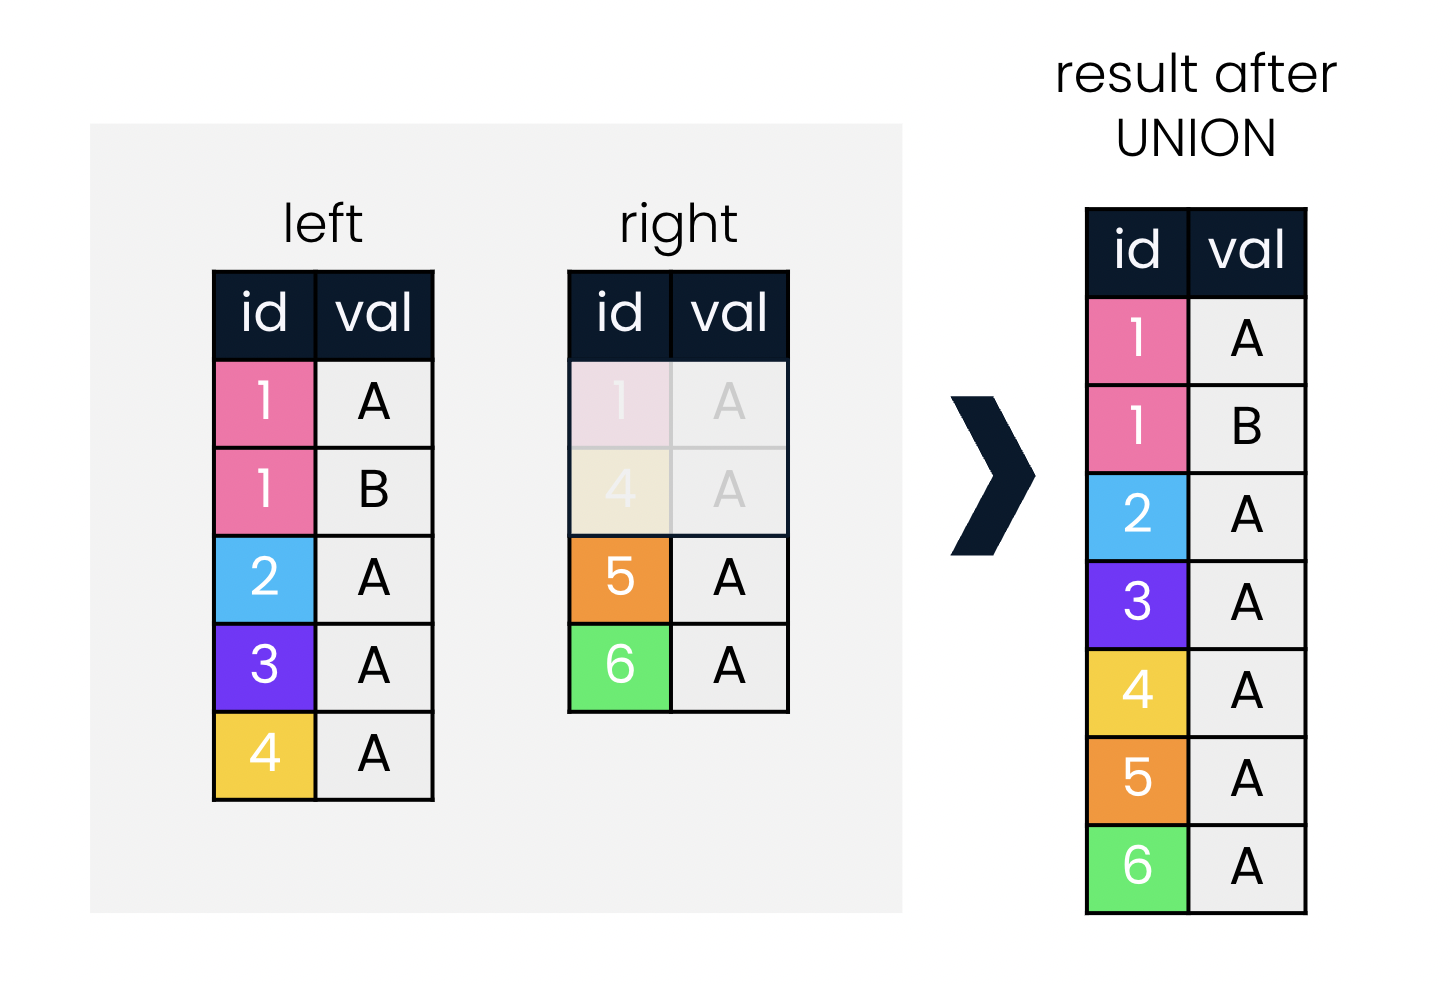

In [186]:
%%sql
SELECT EpisodeID, Title 
FROM Episode_Info 
UNION
SELECT EpisodeNewID, Viewership_premiere_US 
FROM Viewership_Info;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Title
1,9.99M
1,The Heirs of the Dragon
2,10.2M
2,The Rogue Prince
3,Second of His Name
3,nan
4,King of the Narrow Sea
4,nan
5,We Light the Way
5,nan


# UNION ALL (Includes Duplicates)
Similar to UNION, but keeps duplicate rows.   
Faster than UNION since it does not check for duplicates.

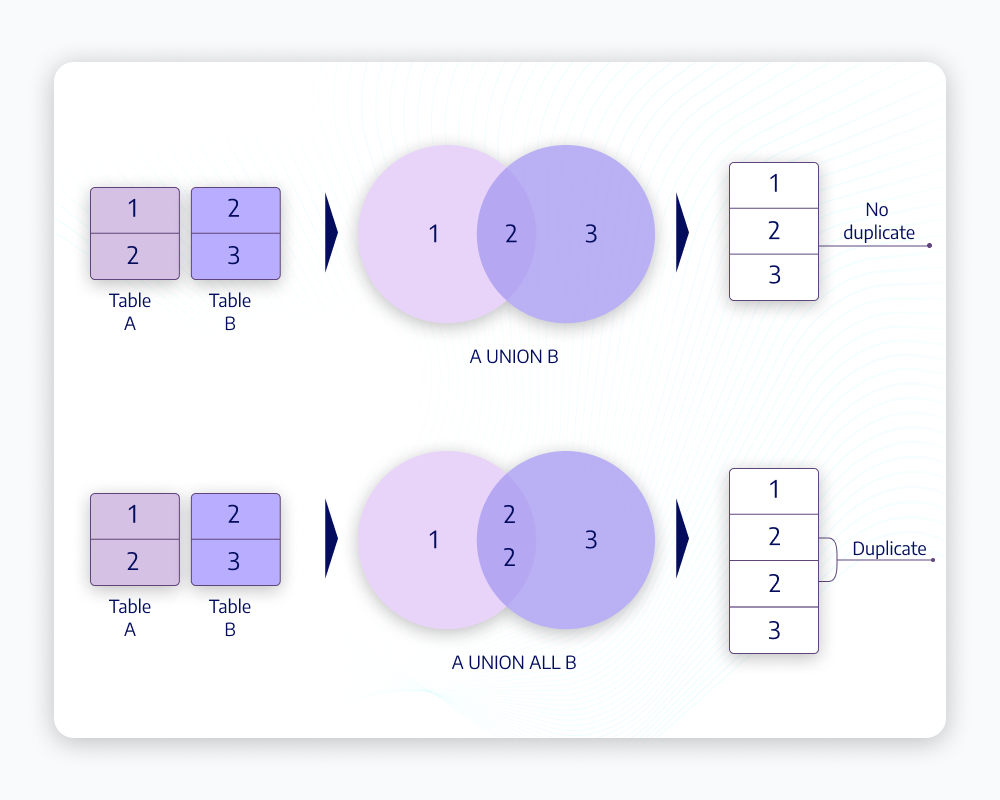

In [187]:
%%sql
SELECT EpisodeID, Title FROM Episode_Info 
UNION ALL
SELECT EpisodeNewID, Viewership_premiere_US FROM Viewership_Info;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Title
1,The Heirs of the Dragon
2,The Rogue Prince
3,Second of His Name
4,King of the Narrow Sea
5,We Light the Way
6,The Princess and the Queen
7,Driftmark
8,The Lord of the Tides
9,The Green Council
10,The Black Queen


# INTERSECT (Common Rows Only)

Returns only the common rows from both queries.   
Removes duplicates automatically.   
Not supported in MySQL (Use INNER JOIN as an alternative).    

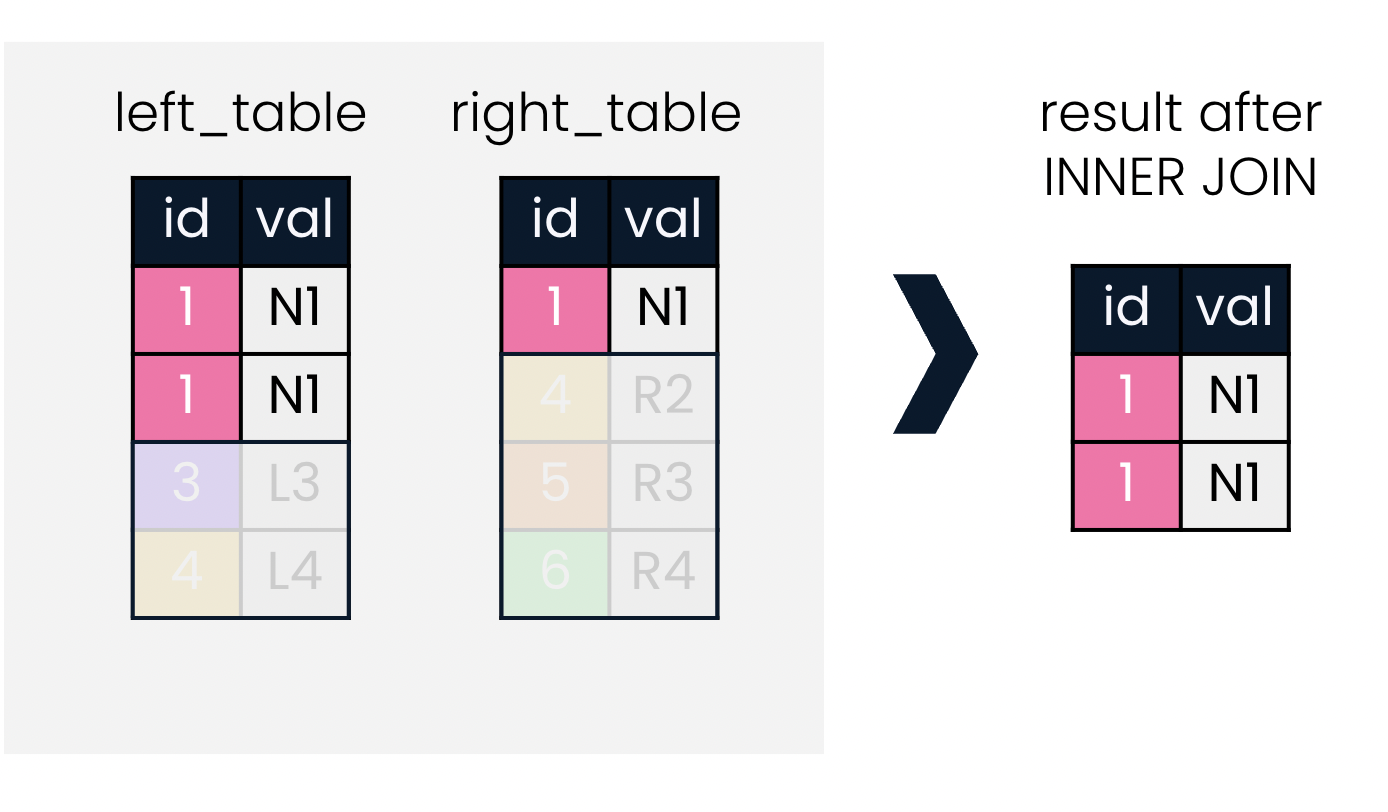

In [188]:
%%sql
SELECT EpisodeID, Title FROM Episode_Info 
INTERSECT
SELECT EpisodeNewID, Viewership_premiere_US FROM Viewership_Info;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Title


# EXCEPT (or MINUS in Oracle) – Unique Rows from First Query
Returns rows from the first query that are not in the second query.   
Removes duplicates automatically.   
EXCEPT is used in PostgreSQL, SQL Server, while MINUS is used in Oracle.   

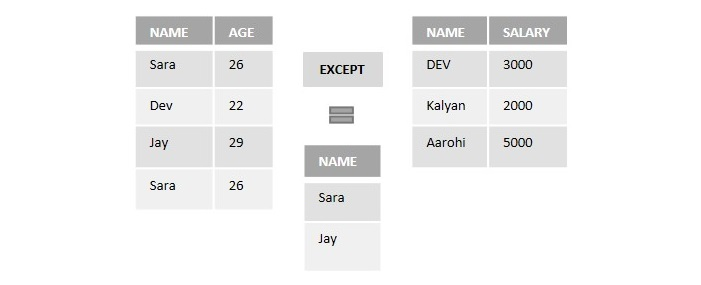

In [189]:
%%sql
SELECT EpisodeID, Title FROM Episode_Info 
EXCEPT
SELECT EpisodeNewID, Viewership_premiere_US FROM Viewership_Info;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Title
1,The Heirs of the Dragon
2,The Rogue Prince
3,Second of His Name
4,King of the Narrow Sea
5,We Light the Way
6,The Princess and the Queen
7,Driftmark
8,The Lord of the Tides
9,The Green Council
10,The Black Queen


# Removing NULL Values

In [190]:
%%sql
SELECT Viewership_premiere_US
FROM Viewership_Info WHERE Viewership_premiere_US IS NOT 'nan';

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Viewership_premiere_US
9.99M
10.2M
9.3M
7.8M
8.1M
8.9M


# GROUP BY

## Count the Number of Episodes per Season

In [191]:
%%sql
SELECT Season, COUNT(*) AS Episode_Count
FROM Episode_Info
GROUP BY Season;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Season,Episode_Count
1,10
2,8


## Average Runtime per Season

In [192]:
%%sql
SELECT Season, AVG(Runtime) AS Avg_Runtime
FROM Episode_Info
GROUP BY Season;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Season,Avg_Runtime
1,61.8
2,64.0


## Count of Episodes Directed by Each Director

In [193]:
%%sql
SELECT Director, COUNT(*) AS Total_Episodes
FROM Episode_Info
GROUP BY Director;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Director,Total_Episodes
Alan Taylor,2
Andrij Parekh,1
Clare Kilner,5
Geeta Vasant Patel,3
Greg Yaitanes,3
Loni Peristere,1
Miguel Sapochnik,3


## Highest Rated Episode per Season

In [194]:
%%sql
SELECT e.Season, e.Title, MAX(v.Average_Rating) AS Max_Rating
FROM Episode_Info e
JOIN Viewership_Info v ON e.EpisodeID = v.EpisodeNewID
GROUP BY e.Season, e.Title
ORDER BY e.Season, Max_Rating DESC;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Season,Title,Max_Rating
1,The Black Queen,0.8300000000000001
1,The Green Council,0.78
1,The Heirs of the Dragon,0.76
1,King of the Narrow Sea,0.76
1,We Light the Way,0.75
1,The Princess and the Queen,0.75
1,The Rogue Prince,0.74
1,Driftmark,0.74
1,The Lord of the Tides,0.73
1,Second of His Name,0.73


# HAVING

## Find Seasons with More Than 8 Episodes

In [195]:
%%sql
SELECT Season, COUNT(*) AS Episode_Count
FROM Episode_Info
GROUP BY Season
HAVING COUNT(*) > 8;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Season,Episode_Count
1,10


## Find Directors Who Directed More Than 2 Episodes

In [196]:
%%sql
SELECT Director, COUNT(*) AS Total_Episodes
FROM Episode_Info
GROUP BY Director
HAVING COUNT(*) > 2;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Director,Total_Episodes
Clare Kilner,5
Geeta Vasant Patel,3
Greg Yaitanes,3
Miguel Sapochnik,3


## Find Writers with an Average Runtime Greater Than 60 Minutes

In [197]:
%%sql
SELECT Writer, AVG(Runtime) AS Avg_Runtime
FROM Episode_Info
GROUP BY Writer
HAVING AVG(Runtime) > 60;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Writer,Avg_Runtime
David Hancock,65.0
Eileen Shim,67.5
"Gabe Fonseca, Ryan Condal",63.0
Ira Parker,63.0
Sara Hess,66.25
Ti Mikkel,63.0


# JOIN Operations

## INNER JOIN
Retrieves only matching records between both tables.

In [198]:
%%sql
SELECT e.EpisodeID, e.Title, v.Viewership_premiere_US, v.Approval_Rating
FROM Episode_Info e
INNER JOIN Viewership_Info v ON e.EpisodeID = v.EpisodeNewID;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Title,Viewership_premiere_US,Approval_Rating
1,The Heirs of the Dragon,9.99M,0.85
2,The Rogue Prince,10.2M,0.85
3,Second of His Name,nan,0.83
4,King of the Narrow Sea,nan,0.87
5,We Light the Way,nan,0.85
6,The Princess and the Queen,nan,0.86
7,Driftmark,nan,0.93
8,The Lord of the Tides,nan,0.91
9,The Green Council,nan,0.85
10,The Black Queen,9.3M,0.93


## LEFT JOIN
🔹 Retrieves all records from the left table (Episode_Info), and if there’s no match in Viewership_Info, it returns NULL.

In [199]:
%%sql
SELECT e.EpisodeID, e.Title, v.Viewership_premiere_US, v.Approval_Rating
FROM Episode_Info e
LEFT JOIN Viewership_Info v ON e.EpisodeID = v.EpisodeNewID;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


EpisodeID,Title,Viewership_premiere_US,Approval_Rating
1,The Heirs of the Dragon,9.99M,0.85
2,The Rogue Prince,10.2M,0.85
3,Second of His Name,nan,0.83
4,King of the Narrow Sea,nan,0.87
5,We Light the Way,nan,0.85
6,The Princess and the Queen,nan,0.86
7,Driftmark,nan,0.93
8,The Lord of the Tides,nan,0.91
9,The Green Council,nan,0.85
10,The Black Queen,9.3M,0.93


## RIGHT JOIN
🔹 Retrieves all records from the right table (Viewership_Info), and if there’s no match in Episode_Info, it returns NULL.

In [200]:
%%sql
SELECT e.EpisodeID, e.Title, v.Viewership_premiere_US, v.Approval_Rating
FROM Episode_Info e
RIGHT JOIN Viewership_Info v ON e.EpisodeID = v.EpisodeNewID;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT e.EpisodeID, e.Title, v.Viewership_premiere_US, v.Approval_Rating
FROM Episode_Info e
RIGHT JOIN Viewership_Info v ON e.EpisodeID = v.EpisodeNewID;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


## FULL OUTER JOIN
🔹 Retrieves all records from both tables. If there’s no match, it returns NULL.

In [201]:
%%sql
SELECT e.EpisodeID, e.Title, v.Viewership_premiere_US, v.Approval_Rating
FROM Episode_Info e
FULL OUTER JOIN Viewership_Info v ON e.EpisodeID = v.EpisodeNewID;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT e.EpisodeID, e.Title, v.Viewership_premiere_US, v.Approval_Rating
FROM Episode_Info e
FULL OUTER JOIN Viewership_Info v ON e.EpisodeID = v.EpisodeNewID;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


## CROSS JOIN
🔹 Produces a Cartesian product (combines every row from one table with every row from another).

In [202]:
%%sql
SELECT e.Title, v.Approval_Rating
FROM Episode_Info e
CROSS JOIN Viewership_Info v;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Title,Approval_Rating
The Heirs of the Dragon,0.85
The Heirs of the Dragon,0.85
The Heirs of the Dragon,0.83
The Heirs of the Dragon,0.87
The Heirs of the Dragon,0.85
The Heirs of the Dragon,0.86
The Heirs of the Dragon,0.93
The Heirs of the Dragon,0.91
The Heirs of the Dragon,0.85
The Heirs of the Dragon,0.93


## JOIN with GROUP BY
🔹 Calculates the average approval rating per season.

In [203]:
%%sql
SELECT e.Season, AVG(v.Approval_Rating) AS Avg_Approval_Rating
FROM Episode_Info e
JOIN Viewership_Info v ON e.EpisodeID = v.EpisodeNewID
GROUP BY e.Season;

 * sqlite:////kaggle/input/houseofthedragontvseries/the_house_of_the_dragon.db
   sqlite:///the_house_of_the_dragon.db
Done.


Season,Avg_Approval_Rating
1,0.873
2,0.8825000000000001


# Thank You